# This goes at the top of your notebook/script

In [2]:
# makes plots show up in the notebook
%matplotlib inline              

import numpy as np              # a library for dealing with arrays/matrices of numbers
import pandas as pd             # a bunch of convenient data structures and functions for data analysis
import matplotlib.pyplot as plt # a library for drawing plots of data
import seaborn as sns

Why the short names? This is a convention lots of python people use, so you'll see it in tutorials and such. And the short names are convenient!

## Pandas data structures

### what is a Series?
1-dimensional data storage

In [3]:
# data is from Brian's fitness tracking app
step_data = [3620,7891,9761,3907,4338,5373,8575,7326,9112,7717,8755,1010,5312,7059]
step_counts = pd.Series(step_data)
step_counts

0     3620
1     7891
2     9761
3     3907
4     4338
5     5373
6     8575
7     7326
8     9112
9     7717
10    8755
11    1010
12    5312
13    7059
dtype: int64

### sounds like a list. how is it different?
indexes don't have to be numbers! so it's also kind of like a dict...

In [4]:
step_counts.index = pd.date_range('20150327',periods=14)
step_counts

2015-03-27    3620
2015-03-28    7891
2015-03-29    9761
2015-03-30    3907
2015-03-31    4338
2015-04-01    5373
2015-04-02    8575
2015-04-03    7326
2015-04-04    9112
2015-04-05    7717
2015-04-06    8755
2015-04-07    1010
2015-04-08    5312
2015-04-09    7059
Freq: D, dtype: int64

This is very convenient for plotting things! the labels are already baked in...

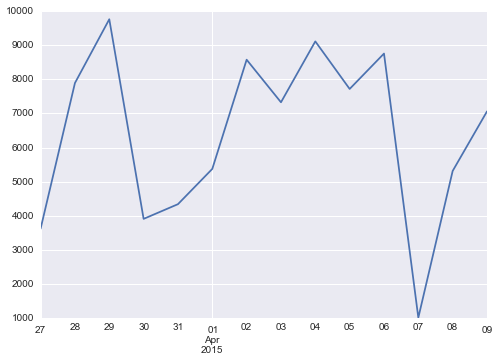

In [5]:
step_counts.plot()

You can access and slice them like lists:

In [6]:
step_counts[3:7] #just want one week of data

2015-03-30    3907
2015-03-31    4338
2015-04-01    5373
2015-04-02    8575
Freq: D, dtype: int64

In [7]:
step_counts[0] #access first element

3620

Or like dictionaries, using the index:

In [8]:
step_counts['2015-04-01']

5373

Some types of indexes, like dates, are smart:

In [9]:
step_counts['2015-04'] #only look at april

2015-04-01    5373
2015-04-02    8575
2015-04-03    7326
2015-04-04    9112
2015-04-05    7717
2015-04-06    8755
2015-04-07    1010
2015-04-08    5312
2015-04-09    7059
Freq: D, dtype: int64

The Series also has some nice convenience functions, like `describe()`, `median()`, and more

In [10]:
step_counts.describe()

count      14.000000
mean     6411.142857
std      2536.826754
min      1010.000000
25%      4581.500000
50%      7192.500000
75%      8404.000000
max      9761.000000
dtype: float64

In [11]:
step_counts.median()

7192.5

and it works with matplotlib to make plots with `plot()` (which we've already used) and histograms with `hist()`

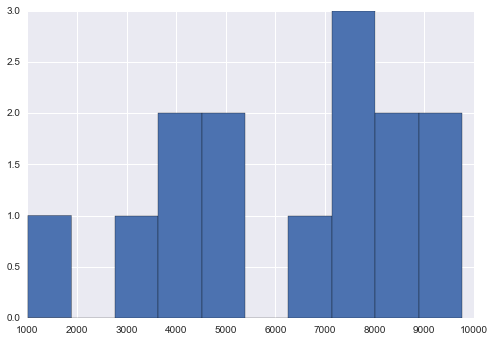

In [12]:
step_counts.hist()

## what is a DataFrame?
2-dimensional data storage!
Like a table, or a dict of Series

In [13]:
cycling_data = [10.7,0,None,2.4,15.3,10.9,0,0,0,10.7,66.5,None,None,10.7]
data = zip(step_data,cycling_data)
activity_frame = pd.DataFrame(data)
activity_frame

,0,1
0,3620,10.7
1,7891,0.0
2,9761,NaN
3,3907,2.4
4,4338,15.3
5,5373,10.9
6,8575,0.0
7,7326,0.0
8,9112,0.0
9,7717,10.7


### how is it different from a list of lists?
indexes for both rows and columns— you can slice and dice the data both ways without flipping it

In [14]:
activity_frame = pd.DataFrame(data,
                             index=pd.date_range('20150327',periods=14),
                             columns=['Walking','Cycling'])
activity_frame

,Walking,Cycling
2015-03-27,3620,10.7
2015-03-28,7891,0.0
2015-03-29,9761,NaN
2015-03-30,3907,2.4
2015-03-31,4338,15.3
2015-04-01,5373,10.9
2015-04-02,8575,0.0
2015-04-03,7326,0.0
2015-04-04,9112,0.0
2015-04-05,7717,10.7


In [15]:
activity_frame['2015-04']

,Walking,Cycling
2015-04-01,5373,10.9
2015-04-02,8575,0.0
2015-04-03,7326,0.0
2015-04-04,9112,0.0
2015-04-05,7717,10.7
2015-04-06,8755,66.5
2015-04-07,1010,NaN
2015-04-08,5312,NaN
2015-04-09,7059,10.7


In [16]:
activity_frame['Cycling']

2015-03-27    10.7
2015-03-28     0.0
2015-03-29     NaN
2015-03-30     2.4
2015-03-31    15.3
2015-04-01    10.9
2015-04-02     0.0
2015-04-03     0.0
2015-04-04     0.0
2015-04-05    10.7
2015-04-06    66.5
2015-04-07     NaN
2015-04-08     NaN
2015-04-09    10.7
Freq: D, Name: Cycling, dtype: float64

In [17]:
activity_frame['Cycling']['2015-04-06']

66.5

There are also some other cool ways to look things up like "boolean indexes":

In [18]:
activity_frame[activity_frame.Walking > 3000]

,Walking,Cycling
2015-03-27,3620,10.7
2015-03-28,7891,0.0
2015-03-29,9761,NaN
2015-03-30,3907,2.4
2015-03-31,4338,15.3
2015-04-01,5373,10.9
2015-04-02,8575,0.0
2015-04-03,7326,0.0
2015-04-04,9112,0.0
2015-04-05,7717,10.7


In [19]:
activity_frame[activity_frame.Walking % 2 == 0]

,Walking,Cycling
2015-03-27,3620,10.7
2015-03-31,4338,15.3
2015-04-03,7326,0.0
2015-04-04,9112,0.0
2015-04-07,1010,NaN
2015-04-08,5312,NaN


In [20]:
activity_frame[activity_frame.Cycling == 10.7]

,Walking,Cycling
2015-03-27,3620,10.7
2015-04-05,7717,10.7
2015-04-09,7059,10.7


You get the same niceties we already talked about: plotting, summaries, etc.

In [21]:
activity_frame.describe()

,Walking,Cycling
count,14.000000,11.000000
mean,6411.142857,11.563636
std,2536.826754,19.114093
min,1010.000000,0.000000
25%,4581.500000,0.000000
50%,7192.500000,10.700000
75%,8404.000000,10.800000
max,9761.000000,66.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e5a4ad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e7d3790>]], dtype=object)

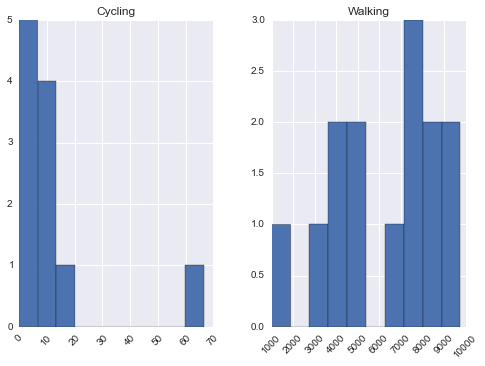

In [22]:
activity_frame.hist(xrot=45)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e8aa490>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10ea5ce90>], dtype=object)

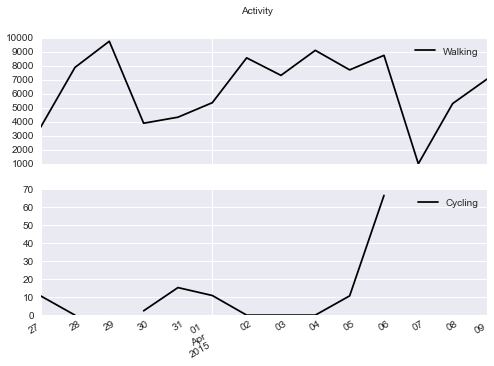

In [23]:
activity_frame.plot(subplots=True, title="Activity")


## WAIT
That doesn't look right...

One of the other things Pandas does well is dealing with missing data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10edf8950>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10efa8410>], dtype=object)

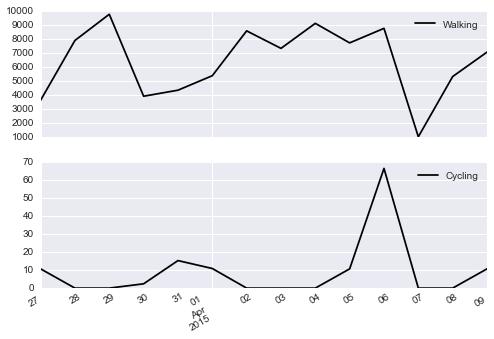

In [25]:
activity_frame.fillna(0).plot(subplots=True)

Alternatively, you can drop the rows with missing values:

In [26]:
activity_frame.dropna()

,Walking,Cycling
2015-03-27,3620,10.7
2015-03-28,7891,0.0
2015-03-30,3907,2.4
2015-03-31,4338,15.3
2015-04-01,5373,10.9
2015-04-02,8575,0.0
2015-04-03,7326,0.0
2015-04-04,9112,0.0
2015-04-05,7717,10.7
2015-04-06,8755,66.5


You can also create new columns in the frame:

In [29]:
steps_in_a_mile = 2250
activity_frame['Walking (Miles)'] = (activity_frame.Walking / 
                                     steps_in_a_mile)
total = activity_frame.fillna(0).Cycling + activity_frame["Walking (Miles)"]
total
activity_frame

,Walking,Cycling,Walking (Miles)
2015-03-27,3620,10.7,1.608889
2015-03-28,7891,0.0,3.507111
2015-03-29,9761,NaN,4.338222
2015-03-30,3907,2.4,1.736444
2015-03-31,4338,15.3,1.928000
2015-04-01,5373,10.9,2.388000
2015-04-02,8575,0.0,3.811111
2015-04-03,7326,0.0,3.256000
2015-04-04,9112,0.0,4.049778
2015-04-05,7717,10.7,3.429778


In [31]:
activity_frame.Cycling = activity_frame.Cycling.fillna(0)
activity_frame['Total Cycling Miles'] = activity_frame.Cycling.cumsum()
activity_frame

,Walking,Cycling,Walking (Miles),Total Cycling Miles
2015-03-27,3620,10.7,1.608889,10.7
2015-03-28,7891,0.0,3.507111,10.7
2015-03-29,9761,0.0,4.338222,10.7
2015-03-30,3907,2.4,1.736444,13.1
2015-03-31,4338,15.3,1.928000,28.4
2015-04-01,5373,10.9,2.388000,39.3
2015-04-02,8575,0.0,3.811111,39.3
2015-04-03,7326,0.0,3.256000,39.3
2015-04-04,9112,0.0,4.049778,39.3
2015-04-05,7717,10.7,3.429778,50.0


Sort by any combination of columns:

In [32]:
activity_frame.sort(['Cycling', 'Walking'],ascending=False)

,Walking,Cycling,Walking (Miles),Total Cycling Miles
2015-04-06,8755,66.5,3.891111,116.5
2015-03-31,4338,15.3,1.928000,28.4
2015-04-01,5373,10.9,2.388000,39.3
2015-04-05,7717,10.7,3.429778,50.0
2015-04-09,7059,10.7,3.137333,127.2
2015-03-27,3620,10.7,1.608889,10.7
2015-03-30,3907,2.4,1.736444,13.1
2015-03-29,9761,0.0,4.338222,10.7
2015-04-04,9112,0.0,4.049778,39.3
2015-04-02,8575,0.0,3.811111,39.3


And transpose the table so columns and rows flip:

In [33]:
activity_frame.T

,2015-03-27 00:00:00,2015-03-28 00:00:00,2015-03-29 00:00:00,2015-03-30 00:00:00,2015-03-31 00:00:00,2015-04-01 00:00:00,2015-04-02 00:00:00,2015-04-03 00:00:00,2015-04-04 00:00:00,2015-04-05 00:00:00,2015-04-06 00:00:00,2015-04-07 00:00:00,2015-04-08 00:00:00,2015-04-09 00:00:00
Walking,3620.000000,7891.000000,9761.000000,3907.000000,4338.000,5373.000,8575.000000,7326.000,9112.000000,7717.000000,8755.000000,1010.000000,5312.000000,7059.000000
Cycling,10.700000,0.000000,0.000000,2.400000,15.300,10.900,0.000000,0.000,0.000000,10.700000,66.500000,0.000000,0.000000,10.700000
Walking (Miles),1.608889,3.507111,4.338222,1.736444,1.928,2.388,3.811111,3.256,4.049778,3.429778,3.891111,0.448889,2.360889,3.137333
Total Cycling Miles,10.700000,10.700000,10.700000,13.100000,28.400,39.300,39.300000,39.300,39.300000,50.000000,116.500000,116.500000,116.500000,127.200000


## These are the very basics
We'll come across other things as the class goes on.
And luckily, Pandas has pretty great [documentation](http://pandas.pydata.org/pandas-docs/stable/index.html)